# Compare the Carbon Footprint of Electric Cars vs. Gasoline

### There are three types of electric vehicles data available on my furthers project, internal combustion engine models ICE, plug-in hybrid cars, and fully electric cars. All of these vehicles are partly or wholly powered by an electric motor. During this project I would compare the carbon footprint of electric cars vs. gasoline and the concept of MPG, or miles per gallon, measures the fuel efficiency of ICE vehicles (internal combustion engine models).

# Identify a question 

### How to find out the Greenhouse Gas Score and Air Pollution Score for Gasoline, Gasoline/Electricity, Electricity, and Hydrogen vehicles?

In [1]:
#Import general python packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Load the dataset

In [2]:
#Read ('SmartWay Vehicle List for MY 2022.xlsx') file
df=pd.read_excel('SmartWay Vehicle List for MY 2022.xlsx', "all_alpha_22")
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes


In [3]:
#Identify variables and it's attributes in the dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 403 non-null    object 
 1   Displ                 235 non-null    float64
 2   Cyl                   235 non-null    float64
 3   Trans                 403 non-null    object 
 4   Drive                 403 non-null    object 
 5   Fuel                  403 non-null    object 
 6   Cert Region           403 non-null    object 
 7   Stnd                  403 non-null    object 
 8   Stnd Description      403 non-null    object 
 9   Underhood ID          403 non-null    object 
 10  Veh Class             403 non-null    object 
 11  Air Pollution Score   403 non-null    int64  
 12  City MPG              403 non-null    object 
 13  Hwy MPG               403 non-null    object 
 14  Cmb MPG               403 non-null    object 
 15  Greenhouse Gas Score  4

,Displ,Cyl,Air Pollution Score,Greenhouse Gas Score
count,235.000000,235.000000,403.000000,403.000000
mean,1.994043,4.008511,8.250620,8.823821
std,0.404101,0.381086,1.480963,1.312484
min,1.300000,3.000000,7.000000,7.000000
25%,1.600000,4.000000,7.000000,7.000000
50%,2.000000,4.000000,7.000000,9.000000
75%,2.400000,4.000000,10.000000,10.000000
max,3.600000,6.000000,10.000000,10.000000


# Filter out missing data

In [4]:
#Filtering out missing data with dropna
df1=df.dropna()
df1

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,VOLVO V60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0P3S,station wagon,7,28/70,33/68,30/69,10,Yes
399,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
400,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
401,VOLVO XC90 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,standard SUV,7,26/58,28/53,27/55,9,Yes


Droped 168 row becouse of the missing data

In [5]:
#Passing how='all' to only drop rows that are all NA
df1.dropna(how='all')

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,VOLVO V60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0P3S,station wagon,7,28/70,33/68,30/69,10,Yes
399,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
400,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
401,VOLVO XC90 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,standard SUV,7,26/58,28/53,27/55,9,Yes


Seems none of the rows have all NA value 

# Format data into a more readable format

In [6]:
#Drop 'Trans','Drive', 'Cert Region','Stnd', 'Stnd Description', 'Underhood ID' columns by the mame becouse of no value
df1.drop(['Trans','Drive', 'Cert Region','Stnd', 'Stnd Description', 'Underhood ID' ], axis=1, inplace=True)
df1

C:\Users\Yousof\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Model,Displ,Cyl,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,Gasoline,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,Gasoline,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,Gasoline,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,Gasoline,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,Gasoline/Electricity,midsize car,7,25/66,31/75,27/70,10,Yes
...,...,...,...,...,...,...,...,...,...,...,...
396,VOLVO V60 T8 Recharge,2.0,4.0,Gasoline/Electricity,station wagon,7,28/70,33/68,30/69,10,Yes
399,VOLVO XC60 T8 Recharge,2.0,4.0,Gasoline/Electricity,small SUV,7,24/59,27/55,25/57,8,Yes
400,VOLVO XC60 T8 Recharge,2.0,4.0,Gasoline/Electricity,small SUV,7,24/59,27/55,25/57,8,Yes
401,VOLVO XC90 T8 Recharge,2.0,4.0,Gasoline/Electricity,standard SUV,7,26/58,28/53,27/55,9,Yes


# Filling in missing data

In [7]:
#Calling fillna with 0.0 value to replace missing values with 0.0
df1.fillna(0)

,Model,Displ,Cyl,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,Gasoline,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,Gasoline,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,Gasoline,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,Gasoline,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,Gasoline/Electricity,midsize car,7,25/66,31/75,27/70,10,Yes
...,...,...,...,...,...,...,...,...,...,...,...
396,VOLVO V60 T8 Recharge,2.0,4.0,Gasoline/Electricity,station wagon,7,28/70,33/68,30/69,10,Yes
399,VOLVO XC60 T8 Recharge,2.0,4.0,Gasoline/Electricity,small SUV,7,24/59,27/55,25/57,8,Yes
400,VOLVO XC60 T8 Recharge,2.0,4.0,Gasoline/Electricity,small SUV,7,24/59,27/55,25/57,8,Yes
401,VOLVO XC90 T8 Recharge,2.0,4.0,Gasoline/Electricity,standard SUV,7,26/58,28/53,27/55,9,Yes


# Remove duplicates

In [8]:
# Indicate the dublicated rows with 'duplicated' mothod
df1.duplicated()

0      False
1       True
2      False
3       True
4      False
       ...  
396     True
399    False
400     True
401    False
402     True
Length: 235, dtype: bool

In [9]:
#Drop duplicates where the duplicated arry is false
df1.drop_duplicates()

,Model,Displ,Cyl,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,Gasoline,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,Gasoline,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,Gasoline/Electricity,midsize car,7,25/66,31/75,27/70,10,Yes
10,AUDI Q5 TFSI e quattro,2.0,4.0,Gasoline/Electricity,small SUV,7,25/60,27/61,26/61,10,Yes
28,BMW 330e,2.0,4.0,Gasoline/Electricity,small car,7,25/72,33/80,28/75,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...
391,VOLVO S60 T8 Recharge,2.0,4.0,Gasoline/Electricity,small car,7,28/70,33/68,30/69,10,Yes
393,VOLVO S90 T8 Recharge,2.0,4.0,Gasoline/Electricity,midsize car,7,28/62,31/64,30/63,9,Yes
395,VOLVO V60 T8 Recharge,2.0,4.0,Gasoline/Electricity,station wagon,7,28/70,33/68,30/69,10,Yes
399,VOLVO XC60 T8 Recharge,2.0,4.0,Gasoline/Electricity,small SUV,7,24/59,27/55,25/57,8,Yes


Droped 117 duplicated rows

# Create 5 visualizations that demonstrate the data I have cleansed

# Visualization 1: Histogram

Text(0.5, 1.0, 'Histogram of Fuel')

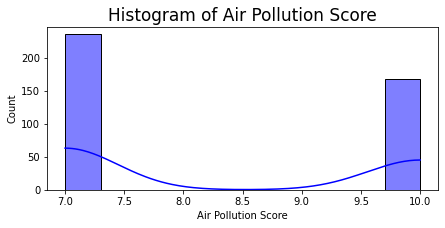

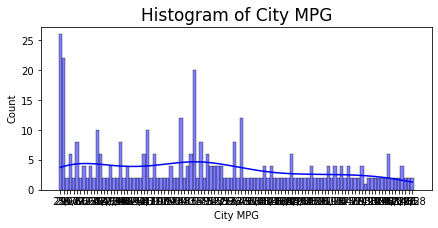

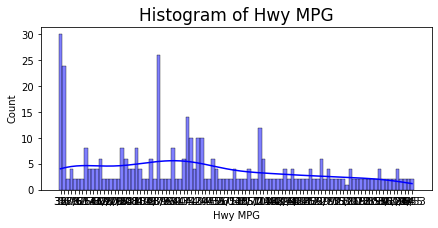

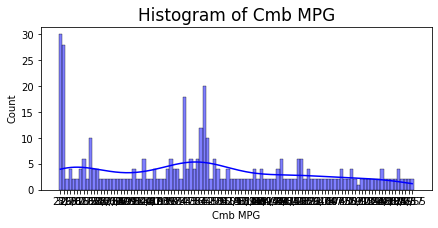

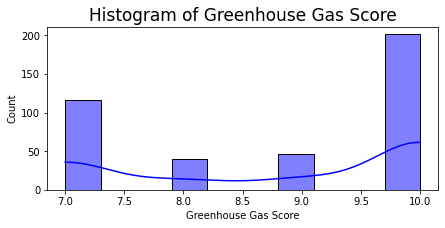

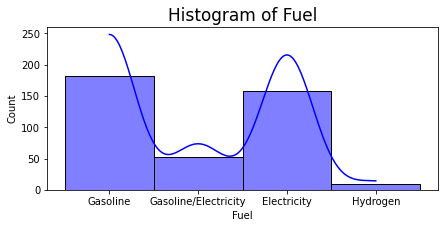

In [10]:
#Draw histogram of 6 variables we are working with

plt.figure(figsize=(7,3))
sns.histplot(df['Air Pollution Score'], kde = True, color = 'blue')
plt.title('Histogram of Air Pollution Score', fontsize=17)

plt.figure(figsize=(7,3))
sns.histplot(df['City MPG'], kde = True, color = 'blue')
plt.title('Histogram of City MPG', fontsize=17)

plt.figure(figsize=(7,3))
sns.histplot(df['Hwy MPG'], kde = True, color = 'blue')
plt.title('Histogram of Hwy MPG', fontsize=17)

plt.figure(figsize=(7,3))
sns.histplot(df['Cmb MPG'], kde = True, color = 'blue')
plt.title('Histogram of Cmb MPG', fontsize=17)

plt.figure(figsize=(7,3))
sns.histplot(df['Greenhouse Gas Score'], kde = True, color = 'blue')
plt.title('Histogram of Greenhouse Gas Score', fontsize=17)

plt.figure(figsize=(7,3))
sns.histplot(df['Fuel'], kde = True, color = 'blue')
plt.title('Histogram of Fuel', fontsize=17)

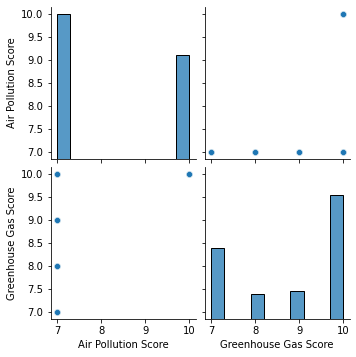

In [11]:
sns.pairplot(df[['Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score','Fuel']])

### Above graphs are displyed the different between Greenhouse Gas Score and Air Pollution Score for Gasoline, Gasoline/Electricity, Electricity, and Hydrogen vehicles, which the lower number being dirtiest and higher number is being the cleanest air pollution score.

# Visualization 2: Bivariate plot 
## Scatter

Text(0.5, 1.0, 'Fule vs. Hwy MPG')

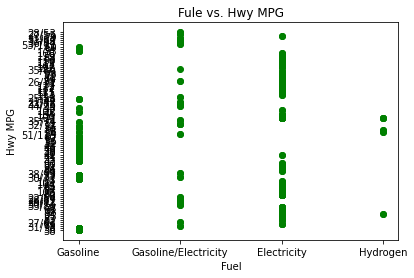

In [12]:
#Scatter plot between Fuel and Hwy MPG 
s = np.random.randint(10,100,30)

plt.scatter(df['Fuel'], df['Hwy MPG'], c ="green",)
plt.xlabel("Fuel")
plt.ylabel("Hwy MPG")
plt.title("Fule vs. Hwy MPG")

# Visualization 3: Matplotlib

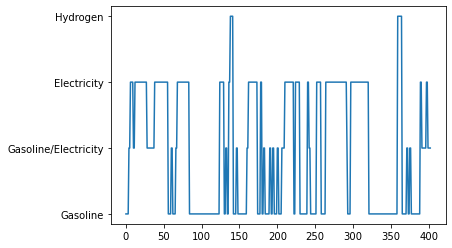

In [13]:
# Plot Fule vs Model
plt.plot(df.Fuel)
plt.show()

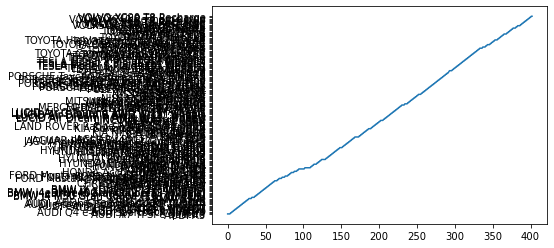

In [14]:
# Plot Fule vs Model
plt.plot(df.Model)
plt.show()

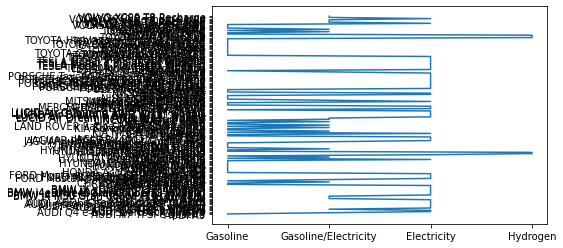

In [15]:
# Plot Fule vs Model
plt.plot(df.Fuel, df.Model)
plt.show()

### Display the X axis is the goal of above plots which show Gasoline is lower score of air pollution and Hydrogen is higher score of air pollution chart. Hydrogen has cleanst air pollution.

#  Visualization 4: Bar plots ueing Matplotlib & Numpy

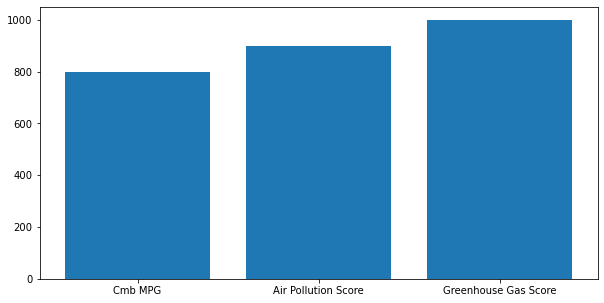

In [16]:
# Display the bar plot of 'Cmb MPG','Air Pollution Score', 'Greenhouse Gas Score'
category = ['Cmb MPG','Air Pollution Score', 'Greenhouse Gas Score']
revenue = np.array([800, 900, 1000])

plt.figure(figsize=(10,5))
plt.bar(category,  revenue)
plt.show()

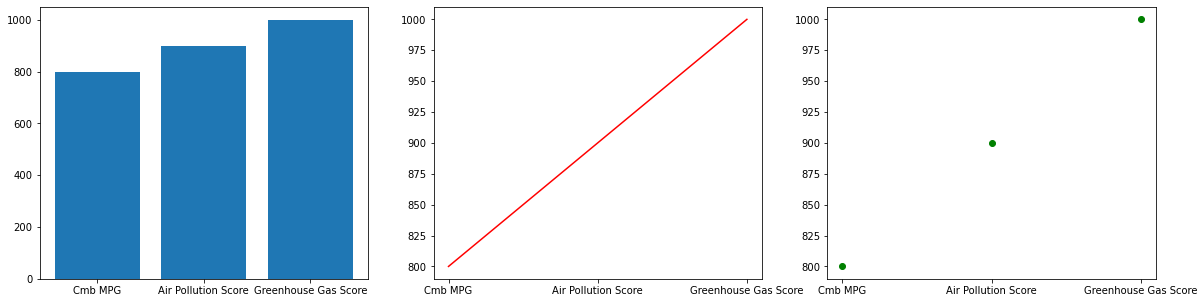

In [17]:
# subplot 'Cmb MPG','Air Pollution Score', 'Greenhouse Gas Score'

category = ['Cmb MPG','Air Pollution Score', 'Greenhouse Gas Score']
revenue = np.array([800,900,1000])

# Ploting it
plt.figure(figsize=(20,5))

# Bar
plt.subplot(131)
plt.bar(range(0,3),revenue)
plt.xticks(range(0,3),category)


# Line
plt.subplot(132)
plt.plot(range(0,3), revenue, c="red")
plt.xticks(range(0,3),category)


# Scatter
plt.subplot(133)
plt.scatter(range(0,3), revenue, c="green")
plt.xticks(range(0,3),category)
plt.show()

# Visualization 5: Lineplots using Pandas DFs

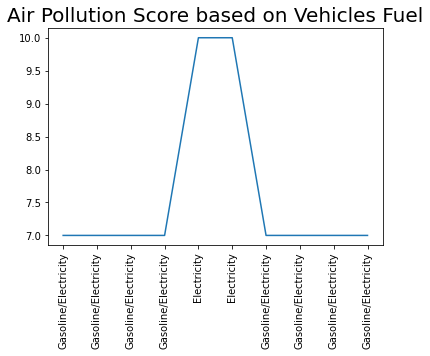

In [18]:
# Plot Air Pollution Score based on Vehicles Fuel
# Using 10 last rows from df to plot Air Pollution Score in this analysis 
a = df.tail(10).reset_index()
plt.plot(a["Air Pollution Score"])
plt.xticks(range(0,len(a["Air Pollution Score"])), a["Fuel"], rotation = 90)
plt.title('Air Pollution Score based on Vehicles Fuel', fontsize = 20)
plt.show()

### Lineplot graph compare the air pollution level between Gasoline/Electricity vs Electricity car, which the lower number being dirtiest and higher number is being the cleanest air pollution score.

# Visualization 6: Boxplot

<AxesSubplot:>

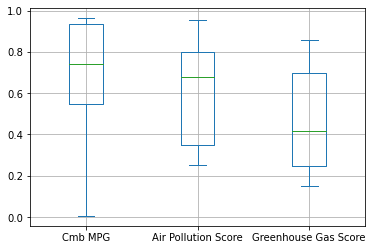

In [19]:
df = pd.DataFrame(np.random.rand(10, 3), columns=['Cmb MPG','Air Pollution Score', 'Greenhouse Gas Score'])
df.plot.box(grid='True')

# Conclusion

### During this analysis I ended up with air pollution score and greenhouse gas score based on vehicles fuel. Any issues such as smog, haze and other problems caused by carbon emissions are all part of air pollution. Vehicles are scored on a scale of 1 to 10, which 1 being dirtiest and 10 being the cleanest. When cars burn gasoline, they emit pollutions. Gasoline fumes escape into the air even when we pump gasoline into our fuel tanks. In the last visualization portion of the project (Visualization 5: Lineplots using Pandas DFs) we clearly see the differences air pollution scores and greenhouse gas score between gasoline, gasoline/electricity, and electricity vehicles.